In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [27]:
data=pd.read_csv(r'C:\users\user\Downloads\Salary_Data.csv')

In [28]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


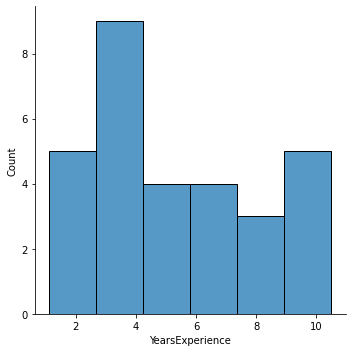

In [30]:
sns.displot(data['YearsExperience'])

E:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

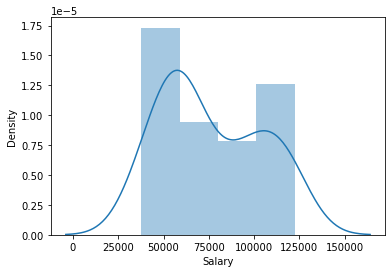

In [31]:
sns.distplot(data['Salary'])

In [32]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

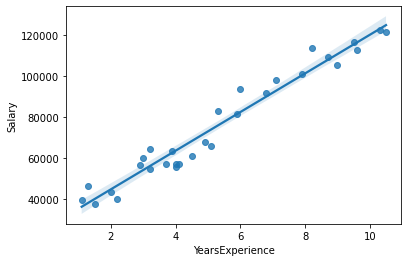

In [33]:
sns.regplot(x=data['YearsExperience'],y=data['Salary'])

In [34]:
model=smf.ols("Salary~YearsExperience",data=data).fit()


In [35]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [36]:
model.tvalues,model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [37]:
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [38]:
Salary=(25792.200199) + (9449.962321)*3
Salary

54142.087162

In [39]:
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [40]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [41]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64

# Transforming variables for accuracy 

In [42]:
model2 = smf.ols('Salary~np.log(YearsExperience)',data=data).fit()

In [43]:
model2.params     

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [44]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sat, 24 Sep 2022   Prob (F-statistic):           3.25e-13
Time:                        16:56:10   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
print(model2.conf_int(0.01)) # 99% confidence level

                                    0             1
Intercept                  679.965646  29175.977894
np.log(YearsExperience)  31815.666558  49348.309362


In [46]:
pred2 = model2.predict(pd.DataFrame(data['YearsExperience']))

In [47]:
pred2.corr(data.Salary)

0.9240610817882637

In [48]:
# pred2 = model2.predict(data.iloc[:,0])
pred2

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

Text(0, 0.5, 'SALARY')

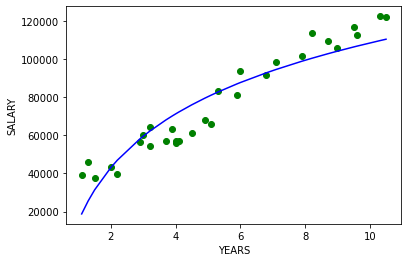

In [49]:
plt.scatter(x=data['YearsExperience'],y=data['Salary'],color='green')
plt.plot(data['YearsExperience'],pred2,color='blue')
plt.xlabel('YEARS');plt.ylabel('SALARY')


# Exponential transformation

In [50]:
model3 = smf.ols('np.log(Salary)~YearsExperience',data=data).fit()

In [51]:
model3.params

Intercept          10.507402
YearsExperience     0.125453
dtype: float64

In [52]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Sat, 24 Sep 2022   Prob (F-statistic):           7.03e-18
Time:                        16:58:38   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
print(model3.conf_int(0.01)) # 99% confidence level

                         0          1
Intercept        10.401175  10.613629
YearsExperience   0.107752   0.143153


In [54]:
pred_log = model3.predict(pd.DataFrame(data['YearsExperience']))
pred_log

0     10.645400
1     10.670491
2     10.695581
3     10.758308
4     10.783398
5     10.871215
6     10.883761
7     10.908851
8     10.908851
9     10.971578
10    10.996668
11    11.009213
12    11.009213
13    11.021759
14    11.071940
15    11.122121
16    11.147212
17    11.172302
18    11.247574
19    11.260119
20    11.360482
21    11.398117
22    11.498480
23    11.536116
24    11.598842
25    11.636478
26    11.699204
27    11.711750
28    11.799567
29    11.824657
dtype: float64

In [55]:
pred3=np.exp(pred_log)       # as we have used log(AT) in preparing model so we need to convert it back
pred3

0      41998.957468
1      43066.066794
2      44160.289228
3      47019.029189
4      48213.688474
5      52639.142472
6      53303.675386
7      54658.014935
8      54658.014935
9      58196.330788
10     59674.982903
11     60428.338456
12     60428.338456
13     61191.204604
14     64340.199291
15     67651.246149
16     69370.128712
17     71132.684635
18     76693.630780
19     77661.835040
20     85860.704208
21     89153.725393
22     98565.809591
23    102346.110512
24    108971.540758
25    113150.933364
26    120475.819601
27    121996.743836
28    133194.621344
29    136578.829694
dtype: float64

In [56]:
pred3.corr(data.Salary)

0.9660469705377085

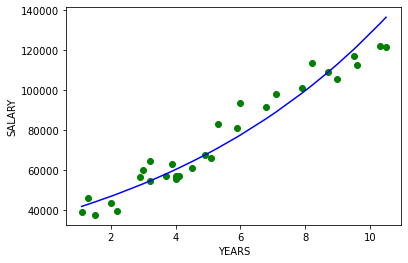

In [59]:
plt.scatter(x=data['YearsExperience'],y=data['Salary'],color='green')
plt.plot(data.YearsExperience,np.exp(pred_log),color='blue')
plt.xlabel('YEARS');plt.ylabel('SALARY')
resid_3 = pred3-data.Salary